In [1]:
import os
import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from numpy import asarray
np.set_printoptions(precision=5)#show 5 number after decimal point 

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_dir = r"data"  # Define your base directory
label = []       # Labels for each category
images_path = [] # Paths of all images
all_images = []  # Names of all images
img_label = []   # Labels corresponding to each image

for directory in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, directory)):
        label.append(directory)
        # Using glob to find all jpg, jpeg, and png files
        for img_path in glob.glob(os.path.join(base_dir, directory, '*.jpg')) + \
                        glob.glob(os.path.join(base_dir, directory, '*.jpeg')) + \
                        glob.glob(os.path.join(base_dir, directory, '*.png')):
            img_name = os.path.basename(img_path)
            all_images.append(img_name)
            images_path.append(img_path)
            img_label.append(directory)

In [3]:
def upload_data(vehicle_dir, non_vehicle_dir):
    data_in_matrix = []
    
    for img_name in tqdm(os.listdir(vehicle_dir)):
        img_path = os.path.join(vehicle_dir, img_name)
        image = Image.open(img_path)  # No conversion to 'L' here
        image_array = np.asarray(image)
        data_in_matrix.append([image_array, 1]) 

    # Upload non-vehicle images
    for img_name in tqdm(os.listdir(non_vehicle_dir)):
        img_path = os.path.join(non_vehicle_dir, img_name)
        image = Image.open(img_path)  # No conversion to 'L' here
        image_array = np.asarray(image)
        data_in_matrix.append([image_array, 0])  

    # Convert data to a NumPy array
    data_in_matrix = np.array(data_in_matrix, dtype=object)
    
    return data_in_matrix

# Define the paths
vehicles_url = r"data\vehicles"
non_vehicles_url = r"data\non-vehicles"

In [4]:
data_in_matrix = upload_data(vehicles_url, non_vehicles_url)

100%|██████████████████████████████████████████████████████████████████████████████| 8968/8968 [01:52<00:00, 79.55it/s]


In [5]:
def extract_features_labels(data):
    X = []
    y = []

    for image_array, label in data:
        X.append(image_array)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X, y


In [6]:
# Extract features (X) and labels (y)
mat_x, mat_y = extract_features_labels(data_in_matrix)

In [7]:
mat_x = mat_x/255.0

In [8]:
#split the data to train and test 
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(mat_x,mat_y, test_size=0.2, random_state=42)
#split the train
X_train_mat, X_val_mat, y_train_mat, y_val_mat = train_test_split(X_train_mat,y_train_mat, test_size=0.2, random_state=42)

In [9]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['non-vehicles', 'vehicles']
Total Images : 17760
 Images shape : (64, 64, 3)


In [10]:
data =pd.DataFrame({'image':images_path,'label':img_label}) 
data

,image,label
0,data\non-vehicles\extra1.png,non-vehicles
1,data\non-vehicles\extra10.png,non-vehicles
2,data\non-vehicles\extra100.png,non-vehicles
3,data\non-vehicles\extra1000.png,non-vehicles
4,data\non-vehicles\extra1001.png,non-vehicles
...,...,...
17755,data\vehicles\right (95).png,vehicles
17756,data\vehicles\right (96).png,vehicles
17757,data\vehicles\right (97).png,vehicles
17758,data\vehicles\right (98).png,vehicles


In [11]:
data = data.sample(frac=1).reset_index()
data.head()

,index,image,label
0,5872,data\non-vehicles\image1722.png,non-vehicles
1,10697,data\vehicles\2558.png,vehicles
2,13670,data\vehicles\5233.png,vehicles
3,8505,data\non-vehicles\image582.png,non-vehicles
4,7643,data\non-vehicles\image3316.png,non-vehicles


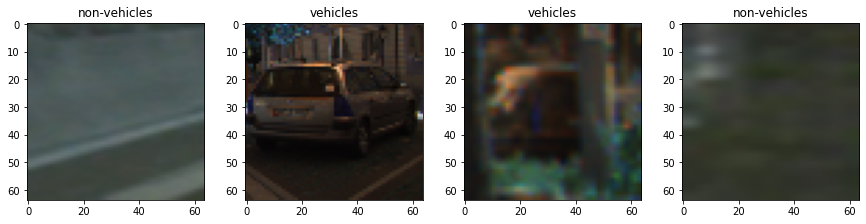

In [12]:
fig = plt.figure(figsize=(15,15))

for i in range(4):
    fig.add_subplot(4,4,i+1).set_title(data['label'][i])
    img = cv2.imread(data['image'][i])
    plt.imshow(img)
    
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17760 entries, 0 to 17759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   17760 non-null  int64 
 1   image   17760 non-null  object
 2   label   17760 non-null  object
dtypes: int64(1), object(2)
memory usage: 416.4+ KB


In [14]:
data['label'].value_counts()

non-vehicles    8968
vehicles        8792
Name: label, dtype: int64

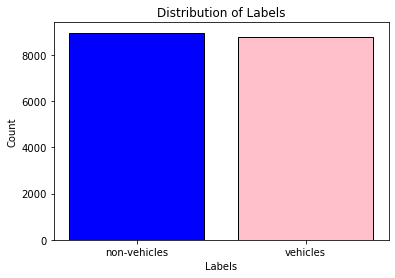

In [15]:
value_counts = data['label'].value_counts()

# Plotting
plt.bar(value_counts.index, value_counts.values, color=['blue', 'pink'],linewidth=1, edgecolor="black")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


# As we can see the data is more or less equally distributed.

In [16]:
X = data.drop('index',axis=1)
Y = data.label

In [17]:
X

,image,label
0,data\non-vehicles\image1722.png,non-vehicles
1,data\vehicles\2558.png,vehicles
2,data\vehicles\5233.png,vehicles
3,data\non-vehicles\image582.png,non-vehicles
4,data\non-vehicles\image3316.png,non-vehicles
...,...,...
17755,data\vehicles\far (125).png,vehicles
17756,data\non-vehicles\image2451.png,non-vehicles
17757,data\vehicles\left (701).png,vehicles
17758,data\non-vehicles\extra3579.png,non-vehicles


In [18]:
X_train, X_final_test, y_train, y_final_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_final_test.shape)

(14208, 2)
(3552, 2)


In [19]:
y_train

15610        vehicles
5230     non-vehicles
15224    non-vehicles
83       non-vehicles
14570        vehicles
             ...     
11284    non-vehicles
11964        vehicles
5390         vehicles
860          vehicles
15795    non-vehicles
Name: label, Length: 14208, dtype: object

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train_mat, y_train_mat)
y_pred = dummy_clf.predict(X_val_mat)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_val_mat),3))

The DummyClassifier score is: 0.497


In [66]:
# Define logistic regression model using TensorFlow 2.x
class LogisticRegression(tf.keras.Model):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(64, 64))  # Flatten input images
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation

    def call(self, x):
        x = self.flatten(x)
        return self.dense(x)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_mat, y_train_mat, epochs=50, batch_size=32, validation_data=(X_val_mat, y_val_mat))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_mat, y_test_mat)

print("Test Accuracy:", test_acc)

# Predictions on the test set
y_pred_prob = model.predict(X_test_mat)

# Convert probabilities to class labels based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_mat, y_pred)
print("Accuracy Score:", accuracy)

Epoch 1/50
356/356 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8301 - val_loss: 0.2963 - val_accuracy: 0.8930
Epoch 2/50
356/356 [==============================] - 1s 3ms/step - loss: 0.3074 - accuracy: 0.8779 - val_loss: 0.2779 - val_accuracy: 0.8973
Epoch 3/50
356/356 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.8968 - val_loss: 0.2554 - val_accuracy: 0.9071
Epoch 4/50
356/356 [==============================] - 1s 2ms/step - loss: 0.2546 - accuracy: 0.9014 - val_loss: 0.2773 - val_accuracy: 0.8927
Epoch 5/50
356/356 [==============================] - 1s 3ms/step - loss: 0.2460 - accuracy: 0.9081 - val_loss: 0.2426 - val_accuracy: 0.9124
Epoch 6/50
356/356 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9099 - val_loss: 0.2364 - val_accuracy: 0.9131
Epoch 7/50
356/356 [==============================] - 1s 2ms/step - loss: 0.2253 - accuracy: 0.9149 - val_loss: 0.2397 - val_accuracy: 0.9106
Epoch 

In [ ]:
class LogisticRegression(tf.keras.Model):
    def __init__(self):  # Make sure to use double underscores for __init_
        super(LogisticRegression, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.flatten(x)
        return self.dense(x)

def build_model(learning_rate=0.001):
    model = LogisticRegression()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

# Wrap the model with KerasClassifier
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

# Define the search space
param_distributions = {
    'learning_rate': np.logspace(-4, 0, 20),
    'batch_size': [16, 32, 64, 128]
}

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                   n_iter=10, scoring=make_scorer(accuracy_score), cv=3)

# Perform the random search (without validation_data in fit method)
random_search.fit(X_train_mat, y_train_mat)


# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best parameters:", best_params)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test_mat, y_test_mat)
print("Test Accuracy of the best model:", test_acc)


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create model
def create_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(64,64,3)),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(2, activation="softmax")
    ])

    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter ranges
learning_rate_range = np.linspace(0.0001, 0.01, 20)
batch_size_options = [16, 32, 64, 128]
shear_range_options = [0.1, 0.2, 0.3]
zoom_range_options = [0.1, 0.2, 0.3]
rotation_range_options = [15, 25, 35]
width_shift_range_options = [0.1, 0.2, 0.3]
height_shift_range_options = [0.1, 0.2, 0.3]

num_trials = 10
best_accuracy = 0
best_params = {}

# Assuming X_train and X_test are your datasets, set up appropriately
# ...

for trial in range(num_trials):
    # Randomly pick hyperparameters from the ranges
    learning_rate = np.random.choice(learning_rate_range)
    batch_size = np.random.choice(batch_size_options)
    shear_range = np.random.choice(shear_range_options)
    zoom_range = np.random.choice(zoom_range_options)
    rotation_range = np.random.choice(rotation_range_options)
    width_shift_range = np.random.choice(width_shift_range_options)
    height_shift_range = np.random.choice(height_shift_range_options)

    # Create ImageDataGenerator with the chosen parameters
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=shear_range,
        zoom_range=zoom_range,
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        horizontal_flip=True,
        validation_split=0.2
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    # Set up your data generators as before
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=X_train,
        x_col="image",
        y_col="label",
        target_size=(64, 64),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=2,
        subset="training")

    validation_generator = train_datagen.flow_from_dataframe(
        dataframe=X_train,
        x_col="image",
        y_col="label",
        target_size=(64, 64),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=2,
        subset="validation")

    # Create and compile a new model with the chosen learning rate
    model = create_model(learning_rate)

    # Train the model using the train generator with the chosen batch size
    model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=2)

    # Evaluate the model using the validation generator
    loss, accuracy = model.evaluate(validation_generator, verbose=0)

    # Update the best hyperparameters if the current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'shear_range': shear_range,
            'zoom_range': zoom_range,
            'rotation_range': rotation_range,
            'width_shift_range': width_shift_range,
            'height_shift_range': height_shift_range
        }
        print(f"Trial {trial+1}/{num_trials}: Improved accuracy to {best_accuracy:.4f} with parameters {best_params}")

print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy}")


Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.




Epoch 1/10



356/356 - 92s - loss: 0.2083 - accuracy: 0.9182 - val_loss: 0.1152 - val_accuracy: 0.9609 - 92s/epoch - 259ms/step
Epoch 2/10
356/356 - 87s - loss: 0.1014 - accuracy: 0.9632 - val_loss: 0.0667 - val_accuracy: 0.9729 - 87s/epoch - 244ms/step
Epoch 3/10
356/356 - 85s - loss: 0.0735 - accuracy: 0.9730 - val_loss: 0.0474 - val_accuracy: 0.9820 - 85s/epoch - 238ms/step
Epoch 4/10
356/356 - 85s - loss: 0.0670 - accuracy: 0.9762 - val_loss: 0.0997 - val_accuracy: 0.9669 - 85s/epoch - 240ms/step
Epoch 5/10
356/356 - 81s - loss: 0.0588 - accuracy: 0.9793 - val_loss: 0.0359 - val_accuracy: 0.9866 - 81s/epoch - 228ms/step
Epoch 6/10
356/356 - 87s - loss: 0.0560 - accuracy: 0.9799 - val_loss: 0.0472 - val_accuracy: 0.9835 - 87s/epoch - 245ms/step
Epoch 7/10
356/356 - 85s - loss: 0.0532 - accuracy: 0.9816 - val_loss: 0.0384 - val_accuracy: 0.9870 - 85s/epoch - 238ms/step
Epoch 8/10
356/356 - 1205s - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.0411 - val_accuracy: 0.9852 - 1205s/epoch - 3s/step
Ep

Epoch 1/10
356/356 - 89s - loss: 0.2588 - accuracy: 0.8924 - val_loss: 0.2124 - val_accuracy: 0.9176 - 89s/epoch - 249ms/step
Epoch 2/10
356/356 - 87s - loss: 0.1531 - accuracy: 0.9422 - val_loss: 0.1686 - val_accuracy: 0.9412 - 87s/epoch - 245ms/step
Epoch 3/10
356/356 - 73s - loss: 0.1001 - accuracy: 0.9643 - val_loss: 0.0965 - val_accuracy: 0.9634 - 73s/epoch - 205ms/step
Epoch 4/10
356/356 - 62s - loss: 0.0874 - accuracy: 0.9692 - val_loss: 0.0630 - val_accuracy: 0.9782 - 62s/epoch - 173ms/step
Epoch 5/10
356/356 - 1744s - loss: 0.0797 - accuracy: 0.9715 - val_loss: 0.0569 - val_accuracy: 0.9796 - 1744s/epoch - 5s/step
Epoch 6/10
356/356 - 62s - loss: 0.0663 - accuracy: 0.9751 - val_loss: 0.0636 - val_accuracy: 0.9764 - 62s/epoch - 173ms/step
Epoch 7/10
356/356 - 61s - loss: 0.0646 - accuracy: 0.9747 - val_loss: 0.0712 - val_accuracy: 0.9697 - 61s/epoch - 171ms/step
Epoch 8/10
356/356 - 61s - loss: 0.0625 - accuracy: 0.9770 - val_loss: 0.0574 - val_accuracy: 0.9771 - 61s/epoch - 17

Epoch 1/10
356/356 - 49s - loss: 0.2565 - accuracy: 0.8950 - val_loss: 0.1254 - val_accuracy: 0.9556 - 49s/epoch - 139ms/step
Epoch 2/10
356/356 - 43s - loss: 0.1122 - accuracy: 0.9598 - val_loss: 0.1108 - val_accuracy: 0.9567 - 43s/epoch - 120ms/step
Epoch 3/10
356/356 - 43s - loss: 0.0877 - accuracy: 0.9687 - val_loss: 0.0586 - val_accuracy: 0.9792 - 43s/epoch - 122ms/step
Epoch 4/10
356/356 - 45s - loss: 0.0818 - accuracy: 0.9691 - val_loss: 0.0753 - val_accuracy: 0.9701 - 45s/epoch - 125ms/step
Epoch 5/10
356/356 - 43s - loss: 0.0667 - accuracy: 0.9772 - val_loss: 0.0687 - val_accuracy: 0.9740 - 43s/epoch - 122ms/step
Epoch 6/10
356/356 - 43s - loss: 0.0635 - accuracy: 0.9784 - val_loss: 0.0873 - val_accuracy: 0.9722 - 43s/epoch - 122ms/step
Epoch 7/10
356/356 - 48s - loss: 0.0595 - accuracy: 0.9777 - val_loss: 0.0395 - val_accuracy: 0.9856 - 48s/epoch - 135ms/step
Epoch 8/10
356/356 - 45s - loss: 0.0662 - accuracy: 0.9771 - val_loss: 0.0516 - val_accuracy: 0.9813 - 45s/epoch - 126

Epoch 1/10
356/356 - 45s - loss: 0.2610 - accuracy: 0.8875 - val_loss: 0.1357 - val_accuracy: 0.9497 - 45s/epoch - 126ms/step
Epoch 2/10
356/356 - 44s - loss: 0.1304 - accuracy: 0.9511 - val_loss: 0.0964 - val_accuracy: 0.9599 - 44s/epoch - 125ms/step
Epoch 3/10
356/356 - 43s - loss: 0.1112 - accuracy: 0.9573 - val_loss: 0.0854 - val_accuracy: 0.9673 - 43s/epoch - 122ms/step
Epoch 4/10
356/356 - 44s - loss: 0.0971 - accuracy: 0.9655 - val_loss: 0.0982 - val_accuracy: 0.9609 - 44s/epoch - 123ms/step
Epoch 5/10
356/356 - 44s - loss: 0.0833 - accuracy: 0.9695 - val_loss: 0.1164 - val_accuracy: 0.9542 - 44s/epoch - 123ms/step
Epoch 6/10
356/356 - 44s - loss: 0.0744 - accuracy: 0.9724 - val_loss: 0.0786 - val_accuracy: 0.9655 - 44s/epoch - 124ms/step
Epoch 7/10
356/356 - 43s - loss: 0.0713 - accuracy: 0.9742 - val_loss: 0.1212 - val_accuracy: 0.9574 - 43s/epoch - 121ms/step
Epoch 8/10
356/356 - 43s - loss: 0.0643 - accuracy: 0.9764 - val_loss: 0.0551 - val_accuracy: 0.9789 - 43s/epoch - 122

Epoch 1/10
356/356 - 49s - loss: 0.2284 - accuracy: 0.9038 - val_loss: 0.0959 - val_accuracy: 0.9673 - 49s/epoch - 139ms/step
Epoch 2/10
356/356 - 49s - loss: 0.0995 - accuracy: 0.9625 - val_loss: 0.0926 - val_accuracy: 0.9616 - 49s/epoch - 138ms/step
Epoch 3/10
356/356 - 51s - loss: 0.0831 - accuracy: 0.9699 - val_loss: 0.0693 - val_accuracy: 0.9775 - 51s/epoch - 142ms/step
Epoch 4/10
356/356 - 54s - loss: 0.0795 - accuracy: 0.9711 - val_loss: 0.0656 - val_accuracy: 0.9764 - 54s/epoch - 152ms/step
Epoch 5/10
356/356 - 56s - loss: 0.0664 - accuracy: 0.9773 - val_loss: 0.0974 - val_accuracy: 0.9659 - 56s/epoch - 156ms/step
Epoch 6/10
356/356 - 54s - loss: 0.0699 - accuracy: 0.9733 - val_loss: 0.0520 - val_accuracy: 0.9789 - 54s/epoch - 152ms/step
Epoch 7/10
356/356 - 54s - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0411 - val_accuracy: 0.9866 - 54s/epoch - 153ms/step
Epoch 8/10
356/356 - 55s - loss: 0.0560 - accuracy: 0.9803 - val_loss: 0.0448 - val_accuracy: 0.9873 - 55s/epoch - 154

Epoch 1/10
356/356 - 56s - loss: 0.2247 - accuracy: 0.9089 - val_loss: 0.1261 - val_accuracy: 0.9504 - 56s/epoch - 158ms/step
Epoch 2/10
356/356 - 51s - loss: 0.1147 - accuracy: 0.9571 - val_loss: 0.1636 - val_accuracy: 0.9437 - 51s/epoch - 143ms/step
Epoch 3/10
356/356 - 44s - loss: 0.1153 - accuracy: 0.9570 - val_loss: 0.0746 - val_accuracy: 0.9736 - 44s/epoch - 123ms/step
Epoch 4/10
356/356 - 44s - loss: 0.0788 - accuracy: 0.9712 - val_loss: 0.0675 - val_accuracy: 0.9768 - 44s/epoch - 124ms/step
Epoch 5/10
356/356 - 46s - loss: 0.0640 - accuracy: 0.9764 - val_loss: 0.0972 - val_accuracy: 0.9725 - 46s/epoch - 128ms/step
Epoch 6/10
356/356 - 55s - loss: 0.0689 - accuracy: 0.9744 - val_loss: 0.0511 - val_accuracy: 0.9831 - 55s/epoch - 154ms/step
Epoch 7/10
356/356 - 57s - loss: 0.0606 - accuracy: 0.9786 - val_loss: 0.0597 - val_accuracy: 0.9771 - 57s/epoch - 159ms/step
Epoch 8/10
356/356 - 59s - loss: 0.0618 - accuracy: 0.9782 - val_loss: 0.0341 - val_accuracy: 0.9891 - 59s/epoch - 167

Epoch 1/10
356/356 - 57s - loss: 0.2678 - accuracy: 0.8788 - val_loss: 0.1604 - val_accuracy: 0.9345 - 57s/epoch - 160ms/step
Epoch 2/10
356/356 - 56s - loss: 0.1096 - accuracy: 0.9582 - val_loss: 0.0942 - val_accuracy: 0.9662 - 56s/epoch - 158ms/step
Epoch 3/10
356/356 - 56s - loss: 0.0915 - accuracy: 0.9661 - val_loss: 0.0828 - val_accuracy: 0.9687 - 56s/epoch - 157ms/step
Epoch 4/10
356/356 - 56s - loss: 0.0964 - accuracy: 0.9657 - val_loss: 0.0861 - val_accuracy: 0.9673 - 56s/epoch - 156ms/step
Epoch 5/10
356/356 - 55s - loss: 0.0734 - accuracy: 0.9755 - val_loss: 0.0598 - val_accuracy: 0.9799 - 55s/epoch - 154ms/step
Epoch 6/10
356/356 - 57s - loss: 0.0704 - accuracy: 0.9744 - val_loss: 0.0615 - val_accuracy: 0.9778 - 57s/epoch - 160ms/step
Epoch 7/10
356/356 - 55s - loss: 0.0626 - accuracy: 0.9797 - val_loss: 0.0639 - val_accuracy: 0.9820 - 55s/epoch - 155ms/step
Epoch 8/10
356/356 - 57s - loss: 0.0553 - accuracy: 0.9802 - val_loss: 0.0354 - val_accuracy: 0.9866 - 57s/epoch - 161

Epoch 1/10
356/356 - 50s - loss: 0.2509 - accuracy: 0.8933 - val_loss: 0.2469 - val_accuracy: 0.9117 - 50s/epoch - 139ms/step
Epoch 2/10
356/356 - 52s - loss: 0.1171 - accuracy: 0.9587 - val_loss: 0.0702 - val_accuracy: 0.9701 - 52s/epoch - 145ms/step
Epoch 3/10
356/356 - 54s - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.1373 - val_accuracy: 0.9398 - 54s/epoch - 152ms/step
Epoch 4/10
356/356 - 54s - loss: 0.0768 - accuracy: 0.9732 - val_loss: 0.0705 - val_accuracy: 0.9778 - 54s/epoch - 151ms/step
Epoch 5/10
356/356 - 53s - loss: 0.0798 - accuracy: 0.9711 - val_loss: 0.0563 - val_accuracy: 0.9813 - 53s/epoch - 149ms/step
Epoch 6/10
356/356 - 54s - loss: 0.0603 - accuracy: 0.9792 - val_loss: 0.0602 - val_accuracy: 0.9754 - 54s/epoch - 152ms/step
Epoch 7/10
356/356 - 54s - loss: 0.0549 - accuracy: 0.9798 - val_loss: 0.0538 - val_accuracy: 0.9817 - 54s/epoch - 151ms/step
Epoch 8/10
356/356 - 55s - loss: 0.0813 - accuracy: 0.9713 - val_loss: 0.0453 - val_accuracy: 0.9863 - 55s/epoch - 154

Epoch 1/10
356/356 - 55s - loss: 0.2494 - accuracy: 0.8990 - val_loss: 0.1596 - val_accuracy: 0.9483 - 55s/epoch - 153ms/step
Epoch 2/10
356/356 - 53s - loss: 0.1131 - accuracy: 0.9571 - val_loss: 0.0690 - val_accuracy: 0.9736 - 53s/epoch - 148ms/step
Epoch 3/10
356/356 - 53s - loss: 0.0862 - accuracy: 0.9690 - val_loss: 0.0854 - val_accuracy: 0.9662 - 53s/epoch - 148ms/step
Epoch 4/10
356/356 - 53s - loss: 0.0967 - accuracy: 0.9641 - val_loss: 0.0648 - val_accuracy: 0.9747 - 53s/epoch - 150ms/step
Epoch 5/10
356/356 - 54s - loss: 0.0676 - accuracy: 0.9762 - val_loss: 0.0518 - val_accuracy: 0.9817 - 54s/epoch - 151ms/step
Epoch 6/10
356/356 - 53s - loss: 0.0648 - accuracy: 0.9767 - val_loss: 0.0452 - val_accuracy: 0.9835 - 53s/epoch - 149ms/step
Epoch 7/10
356/356 - 53s - loss: 0.0658 - accuracy: 0.9760 - val_loss: 0.0597 - val_accuracy: 0.9796 - 53s/epoch - 148ms/step
Epoch 8/10
356/356 - 53s - loss: 0.0505 - accuracy: 0.9821 - val_loss: 0.0368 - val_accuracy: 0.9891 - 53s/epoch - 150

Epoch 1/10
356/356 - 56s - loss: 0.2924 - accuracy: 0.8767 - val_loss: 0.1336 - val_accuracy: 0.9493 - 56s/epoch - 156ms/step
Epoch 2/10
356/356 - 56s - loss: 0.1123 - accuracy: 0.9591 - val_loss: 0.0930 - val_accuracy: 0.9637 - 56s/epoch - 157ms/step
Epoch 3/10
356/356 - 54s - loss: 0.0767 - accuracy: 0.9726 - val_loss: 0.0798 - val_accuracy: 0.9704 - 54s/epoch - 151ms/step
Epoch 4/10
356/356 - 53s - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.0591 - val_accuracy: 0.9803 - 53s/epoch - 150ms/step
Epoch 5/10
356/356 - 48s - loss: 0.0760 - accuracy: 0.9721 - val_loss: 0.0504 - val_accuracy: 0.9813 - 48s/epoch - 136ms/step
Epoch 6/10
356/356 - 44s - loss: 0.0652 - accuracy: 0.9770 - val_loss: 0.0469 - val_accuracy: 0.9852 - 44s/epoch - 123ms/step
Epoch 7/10
356/356 - 44s - loss: 0.0601 - accuracy: 0.9795 - val_loss: 0.0612 - val_accuracy: 0.9771 - 44s/epoch - 123ms/step
Epoch 8/10
356/356 - 44s - loss: 0.0518 - accuracy: 0.9823 - val_loss: 0.0349 - val_accuracy: 0.9887 - 44s/epoch - 123

In [28]:
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

test_set = test_datagen.flow_from_dataframe(
    dataframe = X_final_test,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)

Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.
Found 3552 validated image filenames belonging to 2 classes.


In [99]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [100]:
model.compile(optimizer = 'adam', loss= "categorical_crossentropy", metrics=["acc"])

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [102]:
history = model.fit(training_set, epochs=10,validation_data = validation_set, callbacks=[early_stopping],batch_size=32)

Epoch 1/10
356/356 [==============================] - 60s 166ms/step - loss: 0.2516 - acc: 0.8906 - val_loss: 0.1172 - val_acc: 0.9539
Epoch 2/10
356/356 [==============================] - 59s 165ms/step - loss: 0.1043 - acc: 0.9629 - val_loss: 0.0999 - val_acc: 0.9676
Epoch 3/10
356/356 [==============================] - 60s 169ms/step - loss: 0.0665 - acc: 0.9770 - val_loss: 0.0637 - val_acc: 0.9799
Epoch 4/10
356/356 [==============================] - 60s 167ms/step - loss: 0.0613 - acc: 0.9792 - val_loss: 0.0368 - val_acc: 0.9880
Epoch 5/10
356/356 [==============================] - 60s 169ms/step - loss: 0.0532 - acc: 0.9842 - val_loss: 0.0277 - val_acc: 0.9901
Epoch 6/10
356/356 [==============================] - 60s 169ms/step - loss: 0.0325 - acc: 0.9885 - val_loss: 0.0350 - val_acc: 0.9884
Epoch 6: early stopping


In [103]:
test_score = model.evaluate(test_set)

111/111 [==============================] - 6s 57ms/step - loss: 0.0266 - acc: 0.9896


In [104]:
print(f'Test Score:{test_score[1]}')
print(f'Test Loss:{test_score[0]}')

Test Score:0.9895833134651184
Test Loss:0.026605362072587013


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create model
def create_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(64,64,3)),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(2, activation="softmax")
    ])

    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter ranges

num_trials = 10
best_accuracy = 0
best_params = {}

# Assuming X_train and X_test are your datasets, set up appropriately
# ...

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)
    



    # Set up your data generators as before
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col="image",
    y_col="label",
    target_size=(64, 64),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=40,
    shuffle=True,
    seed=2,
    subset="training")

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col="image",
    y_col="label",
    target_size=(64, 64),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=40,
    shuffle=True,
    seed=2,
    subset="validation")

    # Create and compile a new model with the chosen learning rate
model = create_model(0.001)

    # Train the model using the train generator with the chosen batch size
model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=2)

    # Evaluate the model using the validation generator
loss, accuracy = model.evaluate(validation_generator, verbose=0)

    # Update the best hyperparameters if the current model is better

print(f"Loss: {best_params}, accuracy: {accuracy}")


Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.


Epoch 1/10
285/285 - 32s - loss: 0.2501 - accuracy: 0.8904 - val_loss: 0.1202 - val_accuracy: 0.9507 - 32s/epoch - 113ms/step
Epoch 2/10
285/285 - 34s - loss: 0.0874 - accuracy: 0.9691 - val_loss: 0.0441 - val_accuracy: 0.9859 - 34s/epoch - 120ms/step
Epoch 3/10
285/285 - 35s - loss: 0.0569 - accuracy: 0.9804 - val_loss: 0.0345 - val_accuracy: 0.9901 - 35s/epoch - 122ms/step
Epoch 4/10
285/285 - 36s - loss: 0.0466 - accuracy: 0.9840 - val_loss: 0.0504 - val_accuracy: 0.9792 - 36s/epoch - 125ms/step
Epoch 5/10
285/285 - 36s - loss: 0.0400 - accuracy: 0.9861 - val_loss: 0.0341 - val_accuracy: 0.9894 - 36s/epoch - 126ms/step
Epoch 6/10
285/285 - 37s - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0259 - val_accuracy: 0.9916 - 37s/epoch - 130ms/step
Epoch 7/10
285/285 - 37s - loss: 0.0397 - accuracy: 0.9858 - val_loss: 0.0232 - val_accuracy: 0.9930 - 37s/epoch - 131ms/step
Epoch 8/10
285/285 - 38s - loss: 0.0340 - accuracy: 0.9872 - val_loss: 0.0207 - val_accuracy: 0.9912 - 38s/epoch - 134

In [33]:
accuracy = model.evaluate(test_set, verbose=0)
print(f"Accuracy: {accuracy}")

Accuracy: [0.02831442281603813, 0.991272509098053]
